<h1><center> Multitasking Experiment Data Analysis </center></h1>

<h3><center>  Experiment Statements to Test </center></h3>

**0) Multitasking decreases performance** (all parallel vs all consecutive) <br>
**1) Tasks are not age dependant** (older consecutive vs younger consecutive) <br>
**2) Younger generation performs better at multitasking** (older parallel vs younger parallel) <br>
**3) Younger generation performs better at multitasking (verbal tasks)** (older parallel verbal vs younger parallel verbal)<br> 
**4) Younger generation performs better at multitasking (non-verbal tasks)** (older parallel non-verbal vs younger parallel non-verbal)<br>

**<h3><center>  Additional Statements to Test </center></h3>**

**5) Women perform better at multitasking than men** ( parallel men vs parallel women ) <br>
**6) People who read on daily basis perform better at multitasking** ( parallel readers vs parallel non-readers ) <br>

**<h3><center> Structure of data.csv </center></h3>**

**00)** Participant ID **01)** Birth Year **02)** Group ( 0 - parallel, 1 - consecutive ) **03)** Gender ( 0 - man, 1 - woman ) **04)** Reads texts everyday ( 0 - no, 1 - yes )

**05)** T10
**06)** T11
**07)** T12
**08)** T13
**09)** T14
**10)** T15
**11)** T16
**12)** T17
**13)** T18
**14)** T19
**15)** Time of T1
**16)** K10
**17)** K11
**18)** K12
**19)** K13
**20)** K14
**21)** Time of K1 <br>

**22)** T20
**23)** T21
**24)** T22
**25)** T23
**26)** T24
**27)** T25
**28)** T26
**29)** T27
**30)** T28
**31)** T29
**32)** Time of T2
**33)** K10
**34)** K11
**35)** K12
**36)** K13
**37)** K14
**38)** Time of K2 <br>

In [27]:
import random                     # Random number generators
import logging                    # Flexible event logging system
import pandas as pd               # Data analysis and manipulation tool
import matplotlib.pyplot as plt   # Static, animated, and interactive visualizations library
from scipy.stats import ttest_ind # T-test function used for the means of two independent samples

In [28]:
dataframe = pd.read_csv("data.csv")                                         # Creates dataframe from file

T1 = ['T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19'] # Column labels of the T1 task
dataframe['pointsT1'] = dataframe[T1].sum(axis = 1)                         # Sums the points of the T1 task
dataframe['scoreT1'] = dataframe['pointsT1'].multiply(10)                   # Maps the points to the 100% scale

K1 = ['K10', 'K11', 'K12', 'K13', 'K14']                                    # Column labels of the K1 task
dataframe['pointsK1'] = dataframe[K1].sum(axis = 1)                         # Sums the points of the K1 task
dataframe['scoreK1'] = dataframe['pointsK1'].multiply(20)                   # Maps the points to the 100% scale 

T2 = ['T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29'] # Column labels of the T2 task
dataframe['pointsT2'] = dataframe[T2].sum(axis = 1)                         # Sums the points of the T2 task
dataframe['scoreT2'] = dataframe['pointsT2'].multiply(10)                   # Maps the points to the 100% scale

K2 = ['K20', 'K21', 'K22', 'K23', 'K24']                                    # Column labels of the K2 task
dataframe['pointsK2'] = dataframe[K2].sum(axis = 1)                         # Sums the points of the K2 tasks
dataframe['scoreK2'] = dataframe['pointsK2'].multiply(20)                   # Maps the points to the 100% scale

tasksT = ['pointsT1','pointsT2']                                            # Column labels of the T tasks
dataframe['sumT'] = dataframe[tasksT].sum(axis = 1)                         # Sums the points of the T tasks
dataframe['scoreT'] = dataframe['sumT'].multiply(5)                         # Maps the points to the 100% scale

tasksK = ['pointsK1','pointsK2']                                            # Column labels of the K tasks
dataframe['sumK'] = dataframe[tasksK].sum(axis = 1)                         # Sums the points of the K tasks
dataframe['scoreK'] = dataframe['sumK'].multiply(10)                        # Maps the points to the 100% scale

In [29]:
# Makes two samples to be of the equal size by randomly sampling the bigger sample
def equal(firstSample, secondSample):
    
    smaller = min(firstSample.size, secondSample.size)               # Assigns the smaller sample size
    
    if firstSample.size != smaller & secondSample.size == smaller:   # Checks if 2 sample is smaller
        firstSample = firstSample.sample(n = smaller)                # Randomly samples 1 sample
    elif secondSample.size != smaller & firstSample.size == smaller: # Checks if 1 sample is smaller
        secondSample = secondSample.sample(n = smaller)              # Randomly samples 2 sample
        
    return (firstSample, secondSample)

# Calculates the T-test and makes a conclusion based on P-value and significance level
def t_test(firstScore, secondScore, significanceLevel = 0.05, debug = True):
    
    statistic, pValue = ttest_ind(firstScore, secondScore, equal_var = False) # Performs a Welch’s T-test
    if pValue <= significanceLevel:                                           # Checks if null hypothesis is false
        print("We reject the null hypothesis.")
    else:                                                                     # Otherwise claims that it may be true
        print("We cannot reject the null hypothesis.")
    
    if debug == True:                                                         # If set to True, prints T-test results
        print("Test statistic", statistic, "P-value", pValue)

# Plots two histograms by receiving four samples, titles and labels of the plots, as an input     
def histograms(firstScore, secondScore, firstTitle, firstLabels, thirdScore, fourthScore, secondTitle, secondLabels):
    
    logging.getLogger("matplotlib").setLevel(logging.WARNING) # Turns off debugging
    buckets = [0, 10, 20, 30, 40, 50, 60 ,70 ,80, 90, 100]    # Stores evenly spaced bins
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)      # Defines the layout of the figure
    fig.set_size_inches(20, 8)                                # Defines the size of the figure in inches
    
    # Plots the 1 histogram as a subplot
    
    ax1.hist([firstScore, secondScore], bins = buckets, color = ['gray','black'], label = firstLabels)
    ax1.set_ylabel('Participants #')                          # Adds a label to the x axis
    ax1.set_title(firstTitle)                                 # Adds a title to the subplot
    ax1.set_xlabel('Score %')                                 # Adds a label to the y axis
    ax1.legend()                                              # Adds a legend to the subplot
    
    # Plots the 2 histogram as a subplot
    
    ax2.hist([thirdScore, fourthScore], bins = buckets, color = ['gray','black'], label = secondLabels)
    ax2.set_ylabel('Participants #')                          # Adds a label to the x axis
    ax2.set_title(secondTitle)                                # Adds a title to the subplot
    ax2.set_xlabel('Score %')                                 # Adds a label to the y axis
    ax2.legend()                                              # Adds a legend to the subplot

<h1><center>  Experiment Statements to Test </center></h1>
<h3><center> Multitasking Decreases Performance </center></h3>

We cannot reject the null hypothesis.
Test statistic 0.8321837725417215 P-value 0.4102509639169891
We reject the null hypothesis.
Test statistic -2.623797856113133 P-value 0.012370649295834719


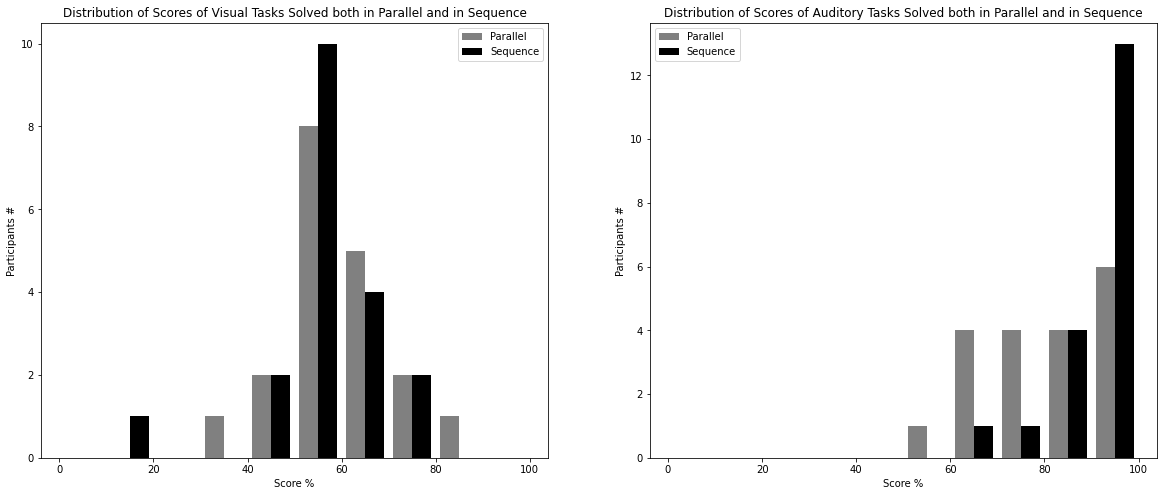

In [30]:
# Extracts the scores of visual tasks solved in parallel
parallelScoreT = dataframe.loc[dataframe['group'] == 0].loc[:,'scoreT']
# Extracts the scores of visual tasks solved in sequence
consecutiveScoreT = dataframe.loc[dataframe['group'] == 1].loc[:,'scoreT']

firstSample, secondSample = equal(parallelScoreT, consecutiveScoreT)
t_test(parallelScoreT, consecutiveScoreT)

# Extracts the scores of auditory tasks solved in parallel
parallelScoreK = dataframe.loc[dataframe['group'] == 0].loc[:,'scoreK']
# Extracts the scores of auditory tasks solved in sequence
consecutiveScoreK = dataframe.loc[dataframe['group'] == 1].loc[:,'scoreK']

thirdSample, fourthSample = equal(parallelScoreK, consecutiveScoreK)
t_test(parallelScoreK, consecutiveScoreK)

firstLabels = ['Parallel', 'Sequence']
secondLabels = ['Parallel', 'Sequence']
firstTitle = 'Distribution of Scores of Visual Tasks Solved both in Parallel and in Sequence'
secondTitle = 'Distribution of Scores of Auditory Tasks Solved both in Parallel and in Sequence'

histograms(firstSample, secondSample, firstTitle, firstLabels, thirdSample, fourthSample, secondTitle, secondLabels)

<h3><center> Tasks Are Not Age Dependant </center></h3>

We cannot reject the null hypothesis.
Test statistic 1.0071599959713595 P-value 0.3321999224490376
We cannot reject the null hypothesis.
Test statistic 1.5268891603224086 P-value 0.15712451053526552


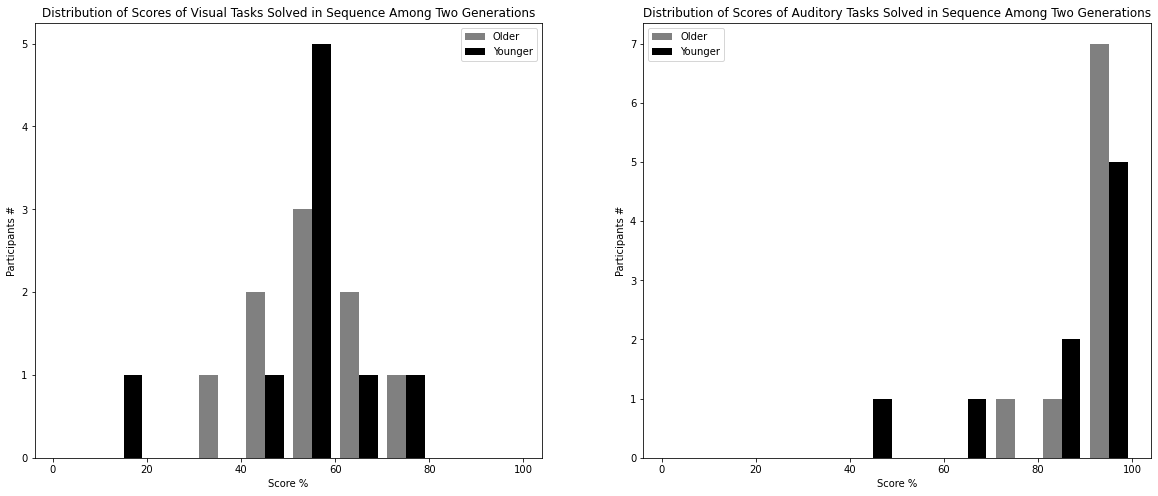

In [31]:
split = 1980 # The year by which generations are split

# Extracts the scores of visual tasks solved in sequence by older generation
oldConsecutiveScoreT = dataframe.loc[(dataframe['year'] < split) & (dataframe['group'] == 1)].loc[:,'scoreT']
# Extracts the scores of visual tasks solved in sequence by younger generation
youngConsecutiveScoreT = dataframe.loc[(dataframe['year'] >= split) & (dataframe['group'] == 1)].loc[:,'scoreT']

firstSample, secondSample = equal(oldConsecutiveScoreT, youngConsecutiveScoreT)
t_test(oldConsecutiveScoreT, youngConsecutiveScoreT)

# Extracts the scores of auditory tasks solved in sequence by older generation
oldConsecutiveScoreK = dataframe.loc[(dataframe['year'] < split) & (dataframe['group'] == 1)].loc[:,'scoreK']
# Extracts the scores of auditory tasks solved in sequence by younger generation
youngConsecutiveScoreK = dataframe.loc[(dataframe['year'] >= split) & (dataframe['group'] == 1)].loc[:,'scoreK']

thirdSample, fourthSample = equal(oldConsecutiveScoreK, youngConsecutiveScoreK)
t_test(oldConsecutiveScoreK, youngConsecutiveScoreK)

firstLabels = ['Older', 'Younger']
secondLabels = ['Older', 'Younger']
firstTitle = 'Distribution of Scores of Visual Tasks Solved in Sequence Among Two Generations'
secondTitle = 'Distribution of Scores of Auditory Tasks Solved in Sequence Among Two Generations'

histograms(firstSample, secondSample, firstTitle, firstLabels, thirdSample, fourthSample, secondTitle, secondLabels)

<h3><center> Younger Generation Performs Better at Multitasking (Visual vs Auditory) </center></h3>

We cannot reject the null hypothesis.
Test statistic -2.1225826586630596 P-value 0.05598280837895985
We reject the null hypothesis.
Test statistic -2.9719538102772782 P-value 0.01068981457876359


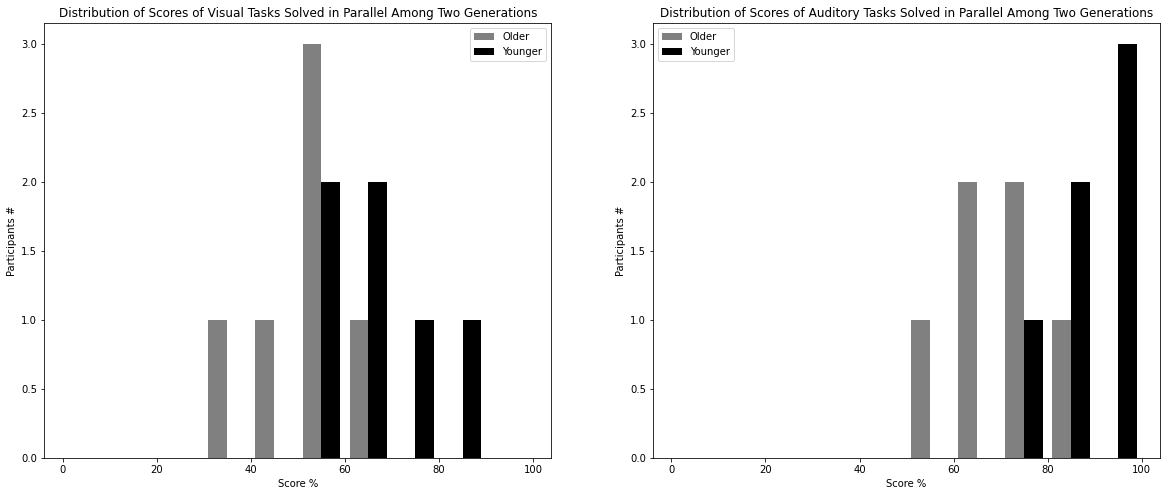

In [32]:
split = 1980  # The year by which generations are split

# Extracts the scores of visual tasks solved in parallel by older generation
oldParallelScoreT = dataframe.loc[(dataframe['year'] < split) & (dataframe['group'] == 0)].loc[:,'scoreT']
# Extracts the scores of visual tasks solved in parallel by younger generation
youngParallelScoreT = dataframe.loc[(dataframe['year'] >= split) & (dataframe['group'] == 0)].loc[:,'scoreT']

firstSample, secondSample = equal(oldParallelScoreT, youngParallelScoreT)
t_test(oldParallelScoreT, youngParallelScoreT)

# Extracts the scores of auditory tasks solved in parallel by older generation
oldParallelScoreK = dataframe.loc[(dataframe['year'] < split) & (dataframe['group'] == 0)].loc[:,'scoreK']
# Extracts the scores of auditory tasks solved in parallel by younger generation
youngParallelScoreK = dataframe.loc[(dataframe['year'] >= split) & (dataframe['group'] == 0)].loc[:,'scoreK']

thirdSample, fourthSample = equal(oldParallelScoreK, youngParallelScoreK)
t_test(oldParallelScoreK, youngParallelScoreK)

firstLabels = ['Older', 'Younger']
secondLabels = ['Older', 'Younger']
firstTitle = 'Distribution of Scores of Visual Tasks Solved in Parallel Among Two Generations'
secondTitle = 'Distribution of Scores of Auditory Tasks Solved in Parallel Among Two Generations'

histograms(firstSample, secondSample, firstTitle, firstLabels, thirdSample, fourthSample, secondTitle, secondLabels)

<h3><center> Younger Generation Performs Better at at Multitasking (Verbal vs Non-Verbal) </center></h3>

We cannot reject the null hypothesis.
Test statistic -0.8510193789138464 P-value 0.4225701146015618
We cannot reject the null hypothesis.
Test statistic -1.907927627078716 P-value 0.07579743209619083


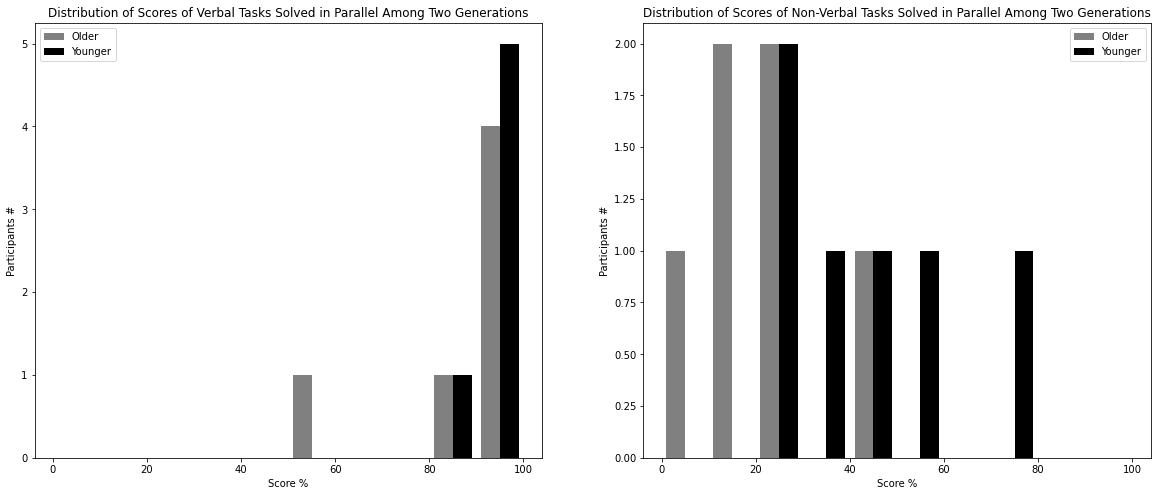

In [33]:
split = 1980  # The year by which generations are split

# Extracts the scores of verbal tasks solved in parallel by older generation
oldParallelScoreT1 = dataframe.loc[(dataframe['year'] < split) & (dataframe['group'] == 0)].loc[:,'scoreT1']
# Extracts the scores of verbal tasks solved in parallel by younger generation
youngParallelScoreT1 = dataframe.loc[(dataframe['year'] >= split) & (dataframe['group'] == 0)].loc[:,'scoreT1']

firstSample, secondSample = equal(oldParallelScoreT1, youngParallelScoreT1)
t_test(oldParallelScoreT1, youngParallelScoreT1)

# Extracts the scores of non-verbal tasks solved in parallel by older generation
oldParallelScoreT2 = dataframe.loc[(dataframe['year'] < split) & (dataframe['group'] == 0)].loc[:,'scoreT2']
# Extracts the scores of non-verbal tasks solved in parallel by younger generation
youngParallelScoreT2 = dataframe.loc[(dataframe['year'] >= split) & (dataframe['group'] == 0)].loc[:,'scoreT2']

thirdSample, fourthSample = equal(oldParallelScoreT2, youngParallelScoreT2)
t_test(oldParallelScoreT2, youngParallelScoreT2)

firstLabels = ['Older', 'Younger']
secondLabels = ['Older', 'Younger']
firstTitle = 'Distribution of Scores of Verbal Tasks Solved in Parallel Among Two Generations'
secondTitle = 'Distribution of Scores of Non-Verbal Tasks Solved in Parallel Among Two Generations'

histograms(firstSample, secondSample, firstTitle, firstLabels, thirdSample, fourthSample, secondTitle, secondLabels)

<h1><center> Additional Statements to Test </center></h1>
<h3><center> Women Perform Better at Multitasking Than Men </center></h3>

We cannot reject the null hypothesis.
Test statistic 0.6862176602483304 P-value 0.5024580657128037
We cannot reject the null hypothesis.
Test statistic -1.7642033041160543 P-value 0.09571034448204963


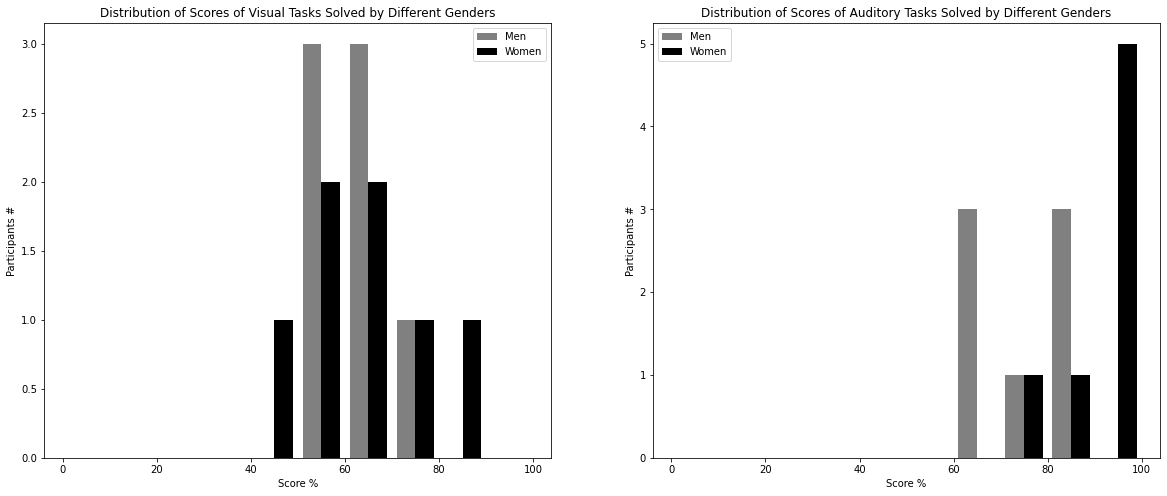

In [34]:
# Extracts the scores of visual tasks solved in parallel by men
parallelManScoreT = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 0)].loc[:,'scoreT']
# Extracts the scores of visual tasks solved in parallel by women
parallelWomanScoreT = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 1)].loc[:,'scoreT']

firstSample, secondSample = equal(parallelManScoreT, parallelWomanScoreT)
t_test(parallelManScoreT, parallelWomanScoreT)

# Extracts the scores of auditory tasks solved in parallel by men
parallelManScoreK = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 0)].loc[:,'scoreK']
# Extracts the scores of auditory tasks solved in parallel by women
parallelWomanScoreK = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 1)].loc[:,'scoreK']

thirdSample, fourthSample = equal(parallelManScoreK, parallelWomanScoreK)
t_test(parallelManScoreK, parallelWomanScoreK)

firstLabels = ['Men', 'Women']
secondLabels = ['Men', 'Women']
firstTitle = 'Distribution of Scores of Visual Tasks Solved by Different Genders'
secondTitle = 'Distribution of Scores of Auditory Tasks Solved by Different Genders'

histograms(firstSample, secondSample, firstTitle, firstLabels, thirdSample, fourthSample, secondTitle, secondLabels)

<h3><center> People Who Read on Daily Basis Perform Better at Multitasking </center></h3>

We cannot reject the null hypothesis.
Test statistic 0.6862176602483304 P-value 0.5024580657128037
We cannot reject the null hypothesis.
Test statistic -1.7642033041160543 P-value 0.09571034448204963


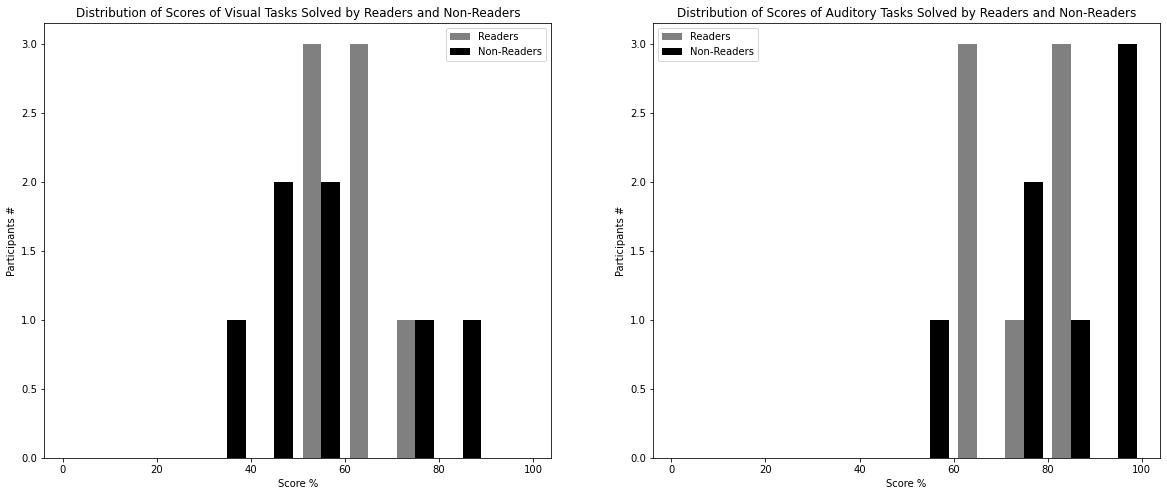

In [35]:
# Extracts the scores of visual tasks solved in parallel by daily readers
parallelReaderScoreT = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 0)].loc[:,'scoreT']
# Extracts the scores of visual tasks solved in parallel by non-daily readers
parallelNonReaderScoreT = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 1)].loc[:,'scoreT']
firstSample, secondSample = equal(parallelReaderScoreT, parallelNonReaderScoreT)
t_test(parallelReaderScoreT, parallelNonReaderScoreT)

# Extracts the scores of auditory tasks solved in parallel by daily readers
parallelReaderScoreK = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 0)].loc[:,'scoreK']
# Extracts the scores of auditory tasks solved in parallel by non-daily readers
parallelNonReaderScoreK = dataframe.loc[(dataframe['group'] == 0) & (dataframe['gender'] == 1)].loc[:,'scoreK']
thirdSample, fourthSample = equal(parallelReaderScoreK, parallelNonReaderScoreK)
t_test(parallelReaderScoreK, parallelNonReaderScoreK)

firstLabels = ['Readers', 'Non-Readers']
secondLabels = ['Readers', 'Non-Readers']
firstTitle = 'Distribution of Scores of Visual Tasks Solved by Readers and Non-Readers'
secondTitle = 'Distribution of Scores of Auditory Tasks Solved by Readers and Non-Readers'

histograms(firstSample, secondSample, firstTitle, firstLabels, thirdSample, fourthSample, secondTitle, secondLabels)